# CISC7202 Course work: Classify images of clothing (tf.Keras)

This course work requires you to train a neural network model to classify images of clothing, like sneakers and shirts.

You are supposed to use [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

Before diving into your course work, let's install some necessary libraries first.

## Prepare Keras libraries:

We have provided you with a requirement.txt that includes all the libraries you need for this course work:

In [207]:
# !pip3 install -r requirements.txt

Then, check the libraries by importing them:

In [208]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf
import os

print(tf.__version__)

1.15.0-rc3


## A "Hello world!" example of neural network:

Before kicking off your own neural networks, we will demonstrate the simplest machine learning task using a single-layer perceptron to recognize handwritten digits. 

[MNIST](http://yann.lecun.com/exdb/mnist/) is often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.). 

First, import the MNIST data set from Keras:

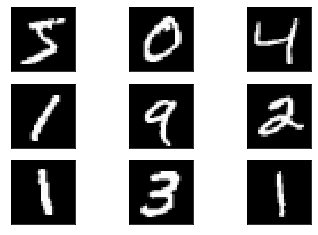

In [209]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray', interpolation='none')


The data must be preprocessed before training the network. Scale these values to a range of 0 to 1 by dividing the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [210]:
train_images = train_images / 255.0
test_images = test_images / 255.0

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Most of deep learning consists of chaining together simple layers:

In [211]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are fully connected neural layers. The first Dense layer has 128 neurons. The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* *Loss function* —This measures how accurate the model is during training.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps.

In [212]:
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.

### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [213]:
model.fit(train_images, train_labels, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 59us/sample - loss: 0.6246 - acc: 0.8432
Epoch 2/40
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3356 - acc: 0.9054
Epoch 3/40
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2890 - acc: 0.9178
Epoch 4/40
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2600 - acc: 0.9263
Epoch 5/40
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2375 - acc: 0.9338
Epoch 6/40
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2191 - acc: 0.9383
Epoch 7/40
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2034 - acc: 0.9434
Epoch 8/40
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1900 - acc: 0.9461
Epoch 9/40
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1777 - acc: 0.9502
Epoch 10/40
60000/60000 [==============================] - 

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.98 (or 98%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [214]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.0861 - acc: 0.9733

Test accuracy: 0.9733


Usually, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

## Now, let's start to build your own neural network:
### Requirements:
1.    Through this notebook, you will be asked to design and train your neural network to classify images of clothing using Fashion MNIST data set.
2.    After the design and training, you will be asked to evaluate the performance of your model.
3.    You should ONLY put your codes in the cells tagged with # Your code here.
4.    How to design and train your neural network is totally up to you. You can try different layers (e.g., convolutional layer), and different training strategies (e.g., different optimizers, different loss functions). There is no absolute right or wrong answer for your model structure. But your code has to be runnable, and the performance of your model has to be above 0.9 (90%) on the test dataset.
5.    You should submit this whole notebook named as StudentID.ipynb. After designing your model, you should run the notebook for at least 3 times and calculate the mean of test accuracy to acquire the final accuracy.

This notebook also shows how to use matplotlib to help the training and evaluation of your model. You don't need to learn how to use it. If you are interested, you can check the official documentation.

## Import the Fashion MNIST dataset

The [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

We use Fashion MNIST because it's a slightly more challenging problem than regular MNIST.

Here, you should use 60,000 images to train the network and 10,000 images to evaluate how accurately your model learned to classify images:

In [215]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label.

In [216]:
train_images.shape

(60000, 28, 28, 1)

In [217]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

There are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

Likewise, there are 60,000 labels in the training set:

In [218]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [219]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [220]:
test_images.shape

(10000, 28, 28, 1)

And the test set contains 10,000 images labels:

In [221]:
len(test_labels)

10000

## Preprocess the data

If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

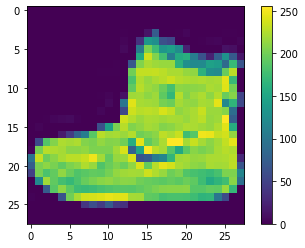

In [222]:
plt.figure()
plt.imshow(train_images[..., 0][0])
plt.colorbar()
plt.grid(False)
plt.show()

Now, you should scale both the train and test datasets by dividing them as mentioned above:

In [223]:
# Your code here
train_images = train_images / 255.0
test_images = test_images / 255.0

We can check the first 25 images from the *training set* and display the class name below each image:

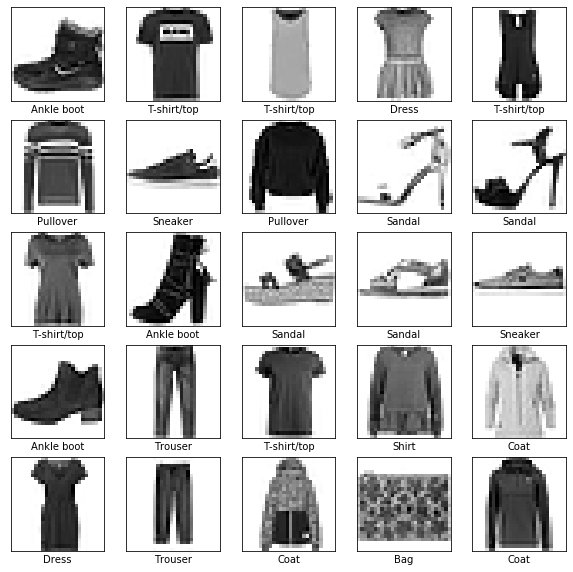

In [224]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[..., 0][i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Now, you are supposed to configure the layers of your model, then compile the model.

### Set up the layers

Here, you are supposed to build a model with modules in keras.layers or any other module necessary. The structure of your model is totally up to you.

In [225]:
# Your code here
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

### Compile the model

Here, you are supposed to choose the appropriate components for training your model:


In [226]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Train the model

Next, you are supposed to train your model by feeding the training data to the model. The training data is in the `train_images` and `train_labels` arrays.


### Feed the model

In [227]:
# Your code here.
model.fit(train_images, train_labels, batch_size=2000, epochs=200)

=====] - 7s 116us/sample - loss: 1.5787 - acc: 0.8824
Epoch 12/200
60000/60000 [==============================] - 7s 116us/sample - loss: 1.5736 - acc: 0.8884
Epoch 13/200
60000/60000 [==============================] - 7s 116us/sample - loss: 1.5742 - acc: 0.8869
Epoch 14/200
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5709 - acc: 0.8900
Epoch 15/200
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5670 - acc: 0.8942
Epoch 16/200
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5616 - acc: 0.8997
Epoch 17/200
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5607 - acc: 0.9010
Epoch 18/200
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5576 - acc: 0.9038
Epoch 19/200
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5552 - acc: 0.9064
Epoch 20/200
60000/60000 [==============================] - 7s 117us/sample - loss: 1.5533 - acc: 0.9078
E

Your model should reach an accuracy of at least 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, evaluate your model on the test dataset using model.evaluate():

In [228]:
# Your code here
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
# End

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.5346 - acc: 0.9264

Test accuracy: 0.9264


Generally, this model should perform less accurately on the test dataset due to the overfitting. However, the accuracy should still be above 90%.

### Make predictions

With the model trained, you can use it to make predictions about some images. Now, you should attach a softmax layer to convert the logits to probabilities. 

In [229]:
probability_model = tf.keras.Sequential([model])

predictions = probability_model.predict(test_images)
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Show the label of your first prediction using np.argmax():

In [230]:
# Your code here
pred_label = np.argmax(predictions, axis = 1)
print(pred_label)

[9 2 1 ... 8 1 5]


Show the corresponding ground truth label and prove that this classification is correct:

In [231]:
# Your code here
predictions.argmax(axis=-1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

Next, we will show you some techniques to visualize your predictions by graphing it to look at the full set of 10 class predictions:

In [232]:
# Some helper functions.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

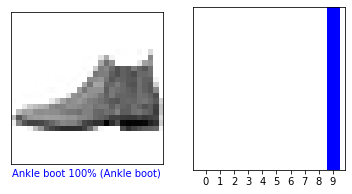

In [233]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images[..., 0])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

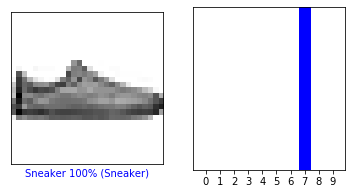

In [234]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images[..., 0])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

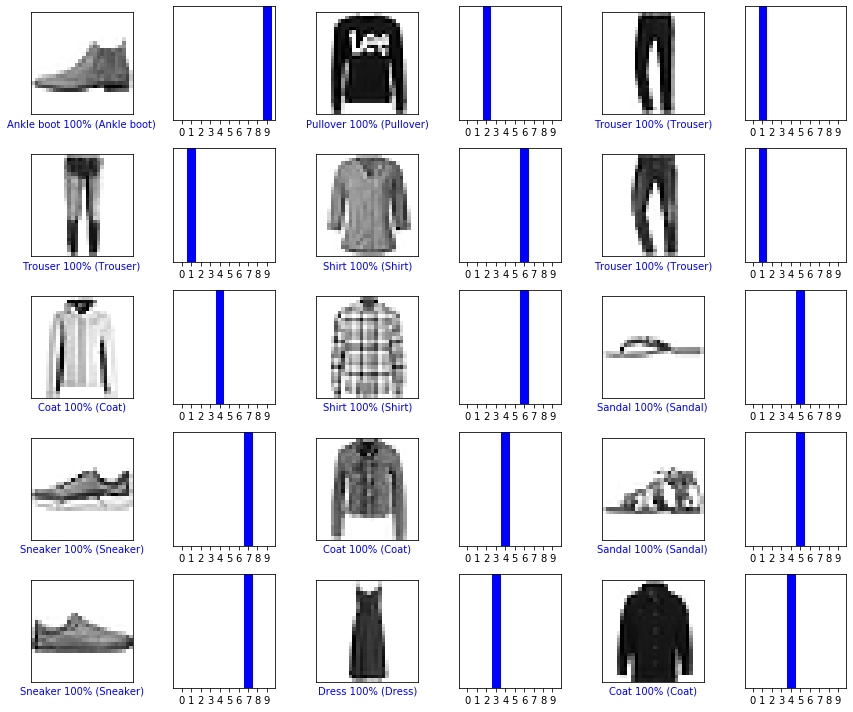

In [235]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images[..., 0])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Then, we will show you how to use the trained model to make a prediction about a single image.

In [236]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28, 1)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [237]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


Now predict the correct label for this image using probability_model.predict():

In [238]:
# Your code here
predictions_single = probability_model.predict(img)
# End

print(predictions_single)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


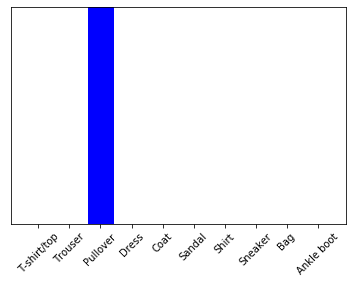

In [239]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [240]:
np.argmax(predictions_single[0])

2

And your model should predicts a label as expected.

Please write down your final accuracy on the test set after running this notebook for at least 3 times:

1.  Training Accuracy: 0.9789, Testing accuracy: 0.9264
2.  Training Accuracy: 0.9781, Testing accuracy: 0.9280
3.  Training Accuracy: 0.9815, Testing accuracy: 0.9312